# Creating word vector Using word2vec #

In this file we will  create a word2vec model trained on public-domain books from project [Gutenberg](https://www.gutenberg.org/)

## Word2vec ##
it is a technique to produce the vector for the words. 
To know more about it :
  1. [Tutorial from Chris McCormick](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)
  2. [Wondeful Visualization](https://lamyiowce.github.io/word2viz/)

You can use the pretrained model from Stanford and Google. But we will train model on small dataset 

In [23]:
#importing the libraries 
import nltk 
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
%matplotlib inline

**Load Data**

In [4]:
# Download the dataset on which model will be trained
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /home/vedic/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [5]:
#Download the dataset for the tokenization in english language 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/vedic/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Tokenize**

In [6]:
from nltk.corpus import gutenberg

In [9]:
#List of the files that are present in gutenberg
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [13]:
#Tokenise the raw text in sentences 
sentences = sent_tokenize(gutenberg.raw())

In [16]:
#Explore the sentences 
sentences[1]

"She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."

In [17]:
#words in the sentences 
word_tokenize(sentences[1])

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [18]:
#Another way for the words 
gutenberg.words()

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

In [29]:
len(sentences)

94428

In [35]:
sentences = gutenberg.sents()

**Build the model and save**

In [36]:
# RUN THIS BLOCK WHEN YOU HAVE TO TRAIN THE MODEL OR YOU CAN USE THE SAVE MODEL #


model = Word2Vec(sentences=sentences, size=64, sg=1, window=10, min_count=5, seed=42, workers=8)
# Save the model for further use 
model.save('data/word2vec_gutenburg.w2v')

**Explore the model**

In [38]:
model = gensim.models.Word2Vec.load('data/word2vec_gutenburg.w2v')

In [46]:
model.wv['car']

array([-0.26691547, -0.11106131,  0.48615977, -0.02956524,  0.44700453,
        0.25274387, -0.68700182,  0.3796809 , -0.02485732,  0.39925313,
        0.49098849,  0.16013534, -0.00407485,  0.00533093,  0.05430712,
        0.14322577,  0.06152992,  0.27093151, -0.16970432, -0.05396729,
       -0.22781968,  0.25064355, -0.0381021 , -1.16738796, -0.1252512 ,
       -0.03935651,  0.32845372, -0.05938593,  0.03735445,  0.1147119 ,
       -0.02638613, -0.35525012, -0.27977878, -0.26529685,  0.14761606,
       -0.10902666, -0.3068611 , -0.33525649,  0.14075987,  0.11969258,
       -0.21309488, -0.21382608, -0.87777835,  0.06644255,  0.07929225,
        0.2785843 ,  0.31186545,  0.11710759, -0.14650688, -0.29589337,
       -0.72694212, -0.35316968, -0.41407081, -0.05631507,  0.53540552,
       -0.45070916,  0.07963088,  0.34145376,  0.34078184,  0.2206154 ,
       -0.52208698,  0.25043675, -0.04112358,  0.40947145], dtype=float32)

In [44]:
model.wv.most_similar('man')

[('fairy', 0.709699809551239),
 ('he', 0.6993778347969055),
 ('figure', 0.6917228698730469),
 ('philosopher', 0.6844155788421631),
 ('mouse', 0.6837405562400818),
 ('one', 0.6816496849060059),
 ('dog', 0.6812597513198853),
 ('detective', 0.6770176887512207),
 ('gentleman', 0.6720563769340515),
 ('policeman', 0.6711593866348267)]

We can see that the most similar to man in '*fairy*'. As the model is not trained on large courpus we didn't get much accurate predictions.

In [50]:
model.wv.most_similar(positive=['male','woman'],negative=['man'])

[('female', 0.7405986785888672),
 ('issue', 0.6481845378875732),
 ('firstlings', 0.6464841961860657),
 ('firstling', 0.6428748369216919),
 ('beeves', 0.6417016386985779),
 ('blessings', 0.6390771269798279),
 ('seed', 0.6362471580505371),
 ('fruits', 0.6358067989349365),
 ('ewe', 0.6311798691749573),
 ('estimation', 0.6299323439598083)]

male - man is approximatly equal to female - woman

**Visualization**

We will use T-SNE method to visulaize multidimensional data in 2-D

In [52]:
X = model.wv[model.wv.vocab]

In [57]:
tsne = TSNE(n_components=2, n_iter=250) # 200 is minimum iter; default is 1000

In [58]:
X_2d = tsne.fit_transform(X)

**Store the results in data frame**

In [60]:
co_ord = pd.DataFrame(X_2d,columns=['x','y'])
co_ord['token'] = model.wv.vocab.keys()

In [62]:
co_ord.head(5)
co_ord.to_csv('data/word2vec_gutenburg_tsne.csv', index=False)

**See plot using the save model**

In [63]:
co_ord = pd.read_csv('data/word2vec_gutenburg_tsne.csv')

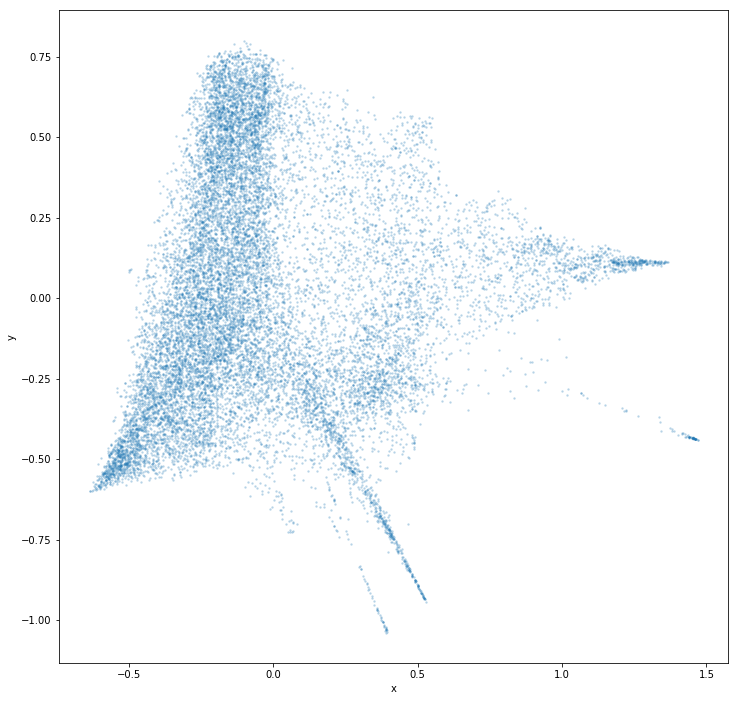

In [64]:
_ = co_ord.plot.scatter('x', 'y', figsize=(12,12), marker='.', s=10, alpha=0.2)

**Better Visulaization**

In [65]:
output_notebook() # for the Bokeh Plot

Loading BokehJS ...

In [69]:
sample_subset = co_ord.sample(n=5000)
p = figure(plot_width=800, plot_height=800)
_ = p.text(x=sample_subset.x, y=sample_subset.y, text=sample_subset.token)

In [70]:
show(p)